# Predict whether the cancer is benign or malignant
sklearn.utils.shuffle use the double amount of memory in my test. I'd like the in-place implemenation without using 2x times memory of the input array
sklearn reduce the memory consumption
matplotlib.gridspec.gridspec contains classes that help to layout multiple Axes in grid-like pattern within a figure .The GridSpace specifies overall grid structure

# 1. diagnosis: The diagnosis of breast tissues (M=malignant,B=benign)
  2.radius_mean=mean of distance from centre to points to perimeter
    
  3.texture_mean=standard deviation of greyscale value

  4.perimeter_mean=mean size of core tumor
    
  5.area_mean

  6.smoothness_mean=mean of local variation in radius lengths
    
  7.compactness_mean=mean of perimeter^2/area-10

  8.concavity_mean=mean of severity of concave portions of the contour
    
  9.concave points_mean=mean for number of concave portions of the contour

  10.fractal_dimension_mean=mean for "coastline approximation"-1
    
  11.radius_se=standard error for the mean of distance from centre to points on the perimeter

  12.texture_se=standard error for standard deviation of grey-scale values
    
  13.smoothness_se =standard error for local variation in radius lengths

  14.compactness_se =standard error for perimeter^2 / area - 1.0
    
  15.concavity_se =standard error for severity of concave portions of the 

  16.concave points_se =standard error for number of concave portions of the contour
    
  17.fractal_dimension_se= standard error for "coastline approximation" - 1

  18.radius_worst"worst" or largest mean value for mean of distances from center to points on the perimeter
    
  19.texture_worst"worst" or largest mean value for standard deviation of gray-scale values

  20.smoothness_worst"worst" or largest mean value for local variation in radius length 
    
  21.compactness_worst"worst" or largest mean value for perimeter^2 / area - 1.0

  22.concavity_worst"worst" or largest mean value for severity of concave portions of the contour
    
  23.fractal_dimension_worst"worst" or largest mean value for "coastline approximation" - 1

In [1]:
%matplotlib inline 
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link="D:/"   #import data
Review=pd.read_csv(link+"dataset.csv")

# import data

In [3]:
train_file="D:/dataset.csv"

# set column keys

In [4]:
idKey = "id"
diagnosisKey = "diagnosis"
radiusMeanKey = "radius_mean"
textureMeanKey = "texture_mean"
perimeterMeanKey = "perimeter_mean"
areaMeanKey = "area_mean"
smoothnessMeanKey = "smoothness_mean"
compactnessMeanKey = "compactness_mean"
concavityMeanKey = "concavity_mean"
concavePointsMeanKey = "concave points_mean"
symmetryMeanKey = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSeKey = "radius_se"
textureSeKey = "texture_se"
perimeterSeKey = "perimeter_se"
areaSeKey = "area_se"
smoothnessSeKey = "smoothness_se"
compactnessSeKey = "compactness_se"
concavitySeKey = "concavity_se"
concavePointsSeKey = "concave points_se"
symmetrySeKey = "symmetry_se"
fractalDimensionSeKey = "fractal_dimension_se"
radiusWorstKey = "radius_worst"
textureWorstKey = "texture_worst"
perimeterWorstKey = "perimeter_worst"
areaWorstKey = "area_worst"
smoothnessWorstKey = "smoothness_worst"
compactnessWorstKey = "compactness_worst"
concavityWorstKey = "concavity_worst"
concavePointsWorstKey = "concave points _worst"
symmetryWorstKey = "symmetry_worst"
fractalDimensionWorstKey = "fractal_dimension_worst"

In [5]:
train_columns = [idKey, diagnosisKey,radiusMeanKey,textureMeanKey, perimeterMeanKey,areaMeanKey, smoothnessMeanKey,
                 compactnessMeanKey, concavityMeanKey, concavePointsMeanKey, symmetryMeanKey,fractalDimensionMean,
                 radiusSeKey, textureSeKey, perimeterSeKey, areaSeKey,smoothnessSeKey, compactnessSeKey, concavitySeKey,
                 concavePointsSeKey, symmetrySeKey, fractalDimensionSeKey,
                 radiusWorstKey, textureWorstKey, perimeterWorstKey, areaWorstKey, 
                 smoothnessWorstKey, compactnessWorstKey, concavityWorstKey, concavePointsWorstKey, 
                 symmetryWorstKey, fractalDimensionWorstKey]

In [6]:
def get_train_data():
    df = pd.read_csv(link+"dataset.csv", names= train_columns, delimiter=',', skiprows=1)
    return df

In [7]:
train_data = get_train_data()

# exploring data

In [8]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points _worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
train_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points _worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#Pandas Series.isnull() function detect missing values in the given series object.
#It return a boolean same-sized object indicating if the values are NA.
#no missing values

train_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points _worst      0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# how area_mean compare across malignant and benign diagnosis

In [11]:
print ("Malignant")
print (train_data.area_mean[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")
print (train_data.area_mean[train_data.diagnosis == "B"].describe())

Malignant
count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

Benign
count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64


# sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
Controls sharing of properties among x (sharex) or y (sharey) axes:
True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.
'row': each subplot row will share an x- or y-axis.
'col': each subplot column will share an x- or y-axis.
When subplots have a shared x-axis along a column, only the x tick labels of
the bottom subplot are created. Similarly, when subplots have a shared y-axis
along a row, only the y tick labels of the first column subplot are created. To
later turn other subplots' ticklabels on, use tick_params.

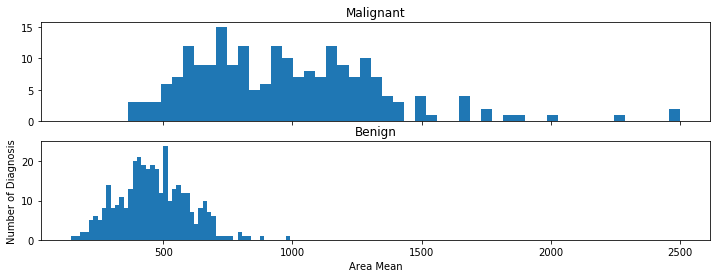

In [12]:
# Creates two subplots and unpacks the output array immediately
#f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
#To construct a histogram, the first step is to "bin" (or "bucket")the range of values—that is, divide the entire range of values into a series of intervals
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train_data.area_mean[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('Malignant')

ax2.hist(train_data.area_mean[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('Benign')

plt.xlabel('Area Mean')
plt.ylabel('Number of Diagnosis')
plt.show()

The 'area_mean' feature looks different as it increases its value across
both types of diagnosis. You could argue that malignant diagnosis are more
are more uniformly distributed, while benign diagnosis have a normal distribution.
This could make it easier to detect a malignant diagnosis when the area_mean is above the 750 value. Now let's
see how the diagnosis area_worst differs between the two types.

In [13]:
#Select only the rest of the features.
r_data = train_data.drop([idKey, areaMeanKey, areaWorstKey, diagnosisKey], axis=1)
r_features = r_data.columns

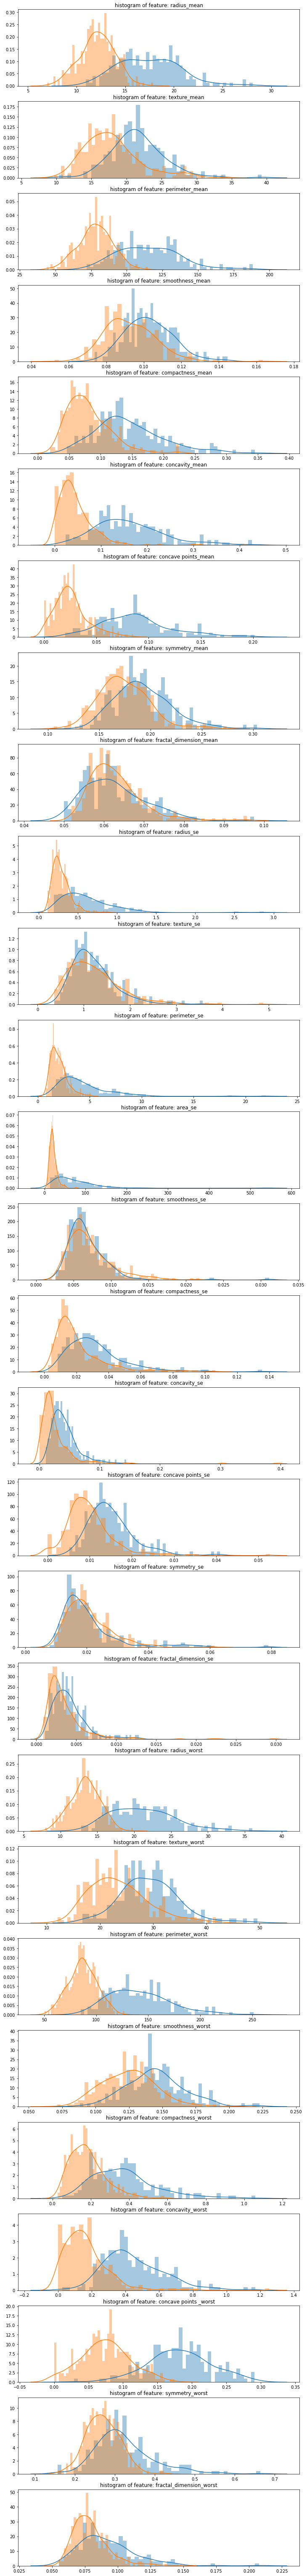

In [14]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(r_data[r_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn][train_data.diagnosis == "M"], bins=50)
    sns.distplot(train_data[cn][train_data.diagnosis == "B"], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

# Update the value of diagnosis. 1 for Malignant and 0 for Benign

In [15]:
train_data.loc[train_data.diagnosis == "M", 'diagnosis'] = 1
train_data.loc[train_data.diagnosis == "B", 'diagnosis'] = 0

# Create a new feature for benign (non-malignant) diagnosis

In [16]:
train_data.loc[train_data.diagnosis == 0, 'benign'] = 1
train_data.loc[train_data.diagnosis == 1, 'benign'] = 0

# Convert benign column type to integer

In [17]:
train_data['benign'] = train_data.benign.astype(int)

# Rename 'Class' to 'Malignant'.

In [18]:
train_data = train_data.rename(columns={'diagnosis': 'malignant'})

In [19]:
#212 malignant dignosis,357 benign diagnosis . 37.25% of diagnostics were malignant
print(train_data.benign.value_counts())
print()
print(train_data.malignant.value_counts())

1    357
0    212
Name: benign, dtype: int64

0    357
1    212
Name: malignant, dtype: int64


In [20]:
pd.set_option("display.max_columns",101)
train_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points _worst,symmetry_worst,fractal_dimension_worst,benign
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Create dataframes of only Malignant and Benign diagnosis

In [21]:
Malignant = train_data[train_data.malignant == 1]
Benign = train_data[train_data.benign == 1]

# Set train_X equal to 80% of the malignant diagnosis

In [22]:
train_X = Malignant.sample(frac=0.8)
count_Malignants = len(train_X)

# add 80% of the benign diagnosis to train_X


In [23]:
train_X=pd.concat([train_X,Benign.sample(frac=0.8)],axis=0)

# test_X contains all the diagnostics not in train_X
Pandas isin() method is used to filter data frames. isin() 
method helps in selecting rows with having a particular(or Multiple)
value in a particular column. Parameters: values: iterable, Series, List,
Tuple, DataFrame or dictionary to check in the caller Series/Data Frame.

In [24]:
test_X=train_data.loc[~train_data.index.isin(train_X.index)]

# Shuffle the dataframes so that trainig is done in a random order
The Syntax of random.shuffle
Out of the two random is an optional parameter. random.shuffle
function used to shuffle the sequence in place. i.e., it changes 
the position of items in a list. We call it a randomizes the elements 
of a list in place.

In [25]:
train_X=shuffle(train_X)
test_X=shuffle(test_X)

# Add our target feature to train_Y and test_y
o concatenate two strings means to append or add one string on
to the end of another. For example, you could concatenate the strings "Python is "
and "a scripting language" to make the complete sentence "Python is a scripting language.


In [26]:
train_Y=train_X.malignant
train_Y=pd.concat([train_Y,train_X.benign],axis=1)

In [27]:
test_Y=test_X.malignant
test_Y=pd.concat([test_Y,test_X.benign],axis=1)

# Drop target feature from train_X and test_X

In [28]:
train_X=train_X.drop(['malignant','benign'],axis=1)
test_X=test_X.drop(['malignant','benign'],axis=1)

# check to ensure all of the training/testing dataframes are of the correct length

In [29]:
print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

456
456
113
113


# Names of all of the features in train_X

In [30]:
features=train_X.columns.values

# Transform each each feature in features so that it has a mean of 0 and standard deviation of 1;This helps with traing(softmax)

In [31]:
for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

# train the nn

In [32]:
#parameter
learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 

In [33]:
#Number of input nodes
input_nodes = train_X.shape[1]

In [34]:
#Number of labels (malignant and benign
num_labels = 2

In [35]:
#Split the testing data into validation and testing sets
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]

C:\Users\RUKHSUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\RUKHSUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\RUKHSUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\RUKHSUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RUKHSUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\RUKHSUN\Anaconda3\lib\site-

In [36]:
def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

In [37]:
#Number of nodes in each hidden layer

hidden_nodes1 = round(calculate_hidden_nodes(input_nodes))
hidden_nodes2 = round(calculate_hidden_nodes(hidden_nodes1))
hidden_nodes3 = round(calculate_hidden_nodes(hidden_nodes2))
print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)

31 23 17 13


# Percent of nodes to keep during dropout.


In [48]:
#Percent of nodes to keep during dropout.

pkeep = tf.placeholder(tf.float32)

# #input

In [49]:
x = tf.placeholder(tf.float32, [None, input_nodes])

In [50]:
#layer1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

In [51]:
#layer2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

In [52]:
!pip istall pkeep


ERROR: unknown command "istall" - maybe you meant "install"



In [53]:
#layer3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.1)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [54]:
#layer4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.1)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output

In [55]:
y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels]) 

In [56]:
#Minimize error using cross entropy

cost = -tf.reduce_sum(y_ * tf.log(y))

In [57]:
#AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [58]:
#test_model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [59]:
#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [60]:
#initializing the variables
init = tf.global_variables_initializer()

Epoch: 0 Acc = 0.65351 Cost = 304.63879 Valid_Acc = 0.64286 Valid_Cost =  37.50275
Epoch: 1 Acc = 0.79825 Cost = 278.99741 Valid_Acc = 0.76786 Valid_Cost =  34.50499
Epoch: 2 Acc = 0.91886 Cost = 222.27582 Valid_Acc = 0.87500 Valid_Cost =  27.95205
Epoch: 3 Acc = 0.95614 Cost = 142.00827 Valid_Acc = 0.87500 Valid_Cost =  18.30639
Epoch: 4 Acc = 0.95833 Cost = 80.25559 Valid_Acc = 0.91071 Valid_Cost =  11.09452
Optimization Finished!


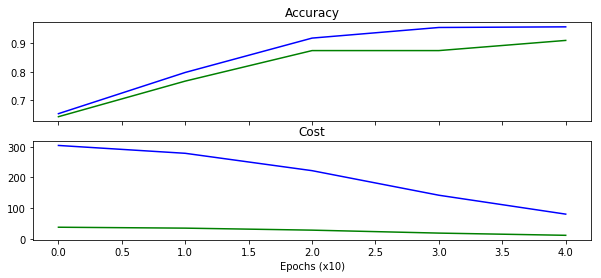

In [61]:
#Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = input_X[batch * batch_size : (1 + batch) * batch_size]
            batch_y = input_Y[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], 
                                               feed_dict={x: input_X, y_: input_Y, 
                                                          pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], 
                                                     feed_dict={x: input_X_valid, 
                                                                y_: input_Y_valid, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost), 
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print("Optimization Finished!")
    
    # Plot the accuracy and cost summaries 
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

    ax1.plot(accuracy_history, color='b') # blue
    ax1.plot(valid_accuracy_history, color='g') # green
    ax1.set_title('Accuracy')

    ax2.plot(cost_history, color='b')
    ax2.plot(valid_cost_history, color='g')
    ax2.set_title('Cost')

    plt.xlabel('Epochs (x10)')
    plt.show()

In [1]:
def KMPSearch(pat, txt): 
    M = len(pat) 
    N = len(txt) 
    lps = [0]*M 
    j = 0 
    computeLPSArray(pat, M, lps) 
    i = 0 
    while i < N: 
        if pat[j] == txt[i]: 
            i += 1
            j += 1
        if j == M: 
            print ("Found pattern at index " + str(i-j)) 
            j = lps[j-1] 
        elif i < N and pat[j] != txt[i]:  
            if j != 0: 
                j = lps[j-1] 
            else: 
                i += 1

def computeLPSArray(pat, M, lps): 
    len = 0 
    lps[0] 
    i = 1
    while i < M: 
        if pat[i]== pat[len]: 
            len += 1
            lps[i] = len
            i += 1
        else:  
            if len != 0: 
                len = lps[len-1] 
            else: 
                lps[i] = 0
                i += 1

txt = "BACBABABABACACA"
pat = "ABABACA"
KMPSearch(pat, txt) 

Found pattern at index 6


In [2]:
def KMPSearch(pat, txt): 
    M = len(pat) 
    N = len(txt) 
    lps = [0]*M 
    j = 0 
    computeLPSArray(pat, M, lps) 
    i = 0 
    while i < N: 
        if pat[j] == txt[i]: 
            i += 1
            j += 1
        if j == M: 
            print ("Found pattern at index " + str(i-j)) 
            j = lps[j-1] 
        elif i < N and pat[j] != txt[i]:  
            if j != 0: 
                j = lps[j-1] 
            else: 
                i += 1

def computeLPSArray(pat, M, lps): 
    len = 0 
    lps[0] 
    i = 1
    while i < M: 
        if pat[i]== pat[len]: 
            len += 1
            lps[i] = len
            i += 1
        else:  
            if len != 0: 
                len = lps[len-1] 
            else: 
                lps[i] = 0
                i += 1

txt = "BACBABABABACACA"
pat = "ABABACA"
KMPSearch(pat, txt) 



Found pattern at index 6


In [3]:
def KMPSearch(pat, txt): 
    M = len(pat) 
    N = len(txt) 
    lps = [0]*M 
    j = 0 
    computeLPSArray(pat, M, lps) 
    i = 0 
    while i < N: 
        if pat[j] == txt[i]: 
            i += 1
            j += 1
        if j == M: 
            print ("Found pattern at index " + str(i-j)) 
            j = lps[j-1] 
        elif i < N and pat[j] != txt[i]:  
            if j != 0: 
                j = lps[j-1] 
            else: 
                i += 1

def computeLPSArray(pat, M, lps): 
    len = 0 
    lps[0] 
    i = 1
    while i < M: 
        if pat[i]== pat[len]: 
            len += 1
            lps[i] = len
            i += 1
        else:  
            if len != 0: 
                len = lps[len-1] 
            else: 
                lps[i] = 0
                i += 1

txt = "BACBABABABACACA"
pat = "ABABACA"
KMPSearch(pat, txt) 


Found pattern at index 6
